Analysis Of Agricultural Data Part 2: Python

By Gehrman Kosenkov



-----------PROJECT DESCRIPTION-----------

DISCLAIMER 

Beware that even though the results of this project were shared with one of my previous employers (AlmaStone*), this file mainly aims to demonstrate my data analysis skills rather than provide commercially valuable insights. 

AlmaStone* is a UK based commodity trade finance fund focused on emerging markets.

OVERALL PROJECT OBJECTIVES:

1) Reveal relevant countries which agricultural sectors have great potential for investment 
2) Analyze certain factors that might presumably affect agricultural production of those countries 

PROJECT STRUCTURE

The project was divided into two parts: Part 1 -SQL and Part 2 -Python.

This file describes Part-2 Python. The link to Part-1 SQL can be found in my portfolio.

-----------ANALYSIS OF AGRICULTURAL DATA PART 2: PYTHON-----------

STAGES

1.Import Of The Table "Grains_Pulses_Meals_USDA" Produced In MySQL

2."Grains_Pulses_Meals_USDA":Data Exploration,Cleaning And Organization

3."Grains_Pulses_Meals_USDA": Analysis Of Key Corn Exporters In 2020

4.Import Of The Table "Fertilizer_Use_USA"

5."Fertilizer_Use_USA": Data Exploration, Cleaning And Organization

6.Import Of The Table "US_Corn_Yield_Acres"

7.Merging "Grains_Pulses_Meals_USDA" with "US_Corn_Yield_Acres" and "Fertilizer_Use_USA"

8.Statistical Analysis

8.1 Precipitation And Instensity Of Fertilizer Use Vs Corn Yields 

8.2 Precipitation;Instensity Of Fertilizer Use And Acreage Vs Corn Production Volumes

9.Conclusions



DATA SOURCES

-Table "Grains_Pulses_Meals_USDA" Produced In MySQL In Part 1 Of This Project 
-Table "Fertilizer_Use_USA" Downloaded From USDA Website 
-Table "US_Corn_Yield_Acres" Comprising The Data Retrieved From USDA Website

SKILLS USED:

Pandas, Numpy, Seaborn, Matplotlib, Scipy, Sklearn, Statistical Analysis, Data Normalization Using Min-Max, Regression Plots, Pearson Coefficient, Residual Plots, Linear Regression, Multiple Linear Regression, MSE, R Squared

1.Import Of "Grains_Pulses_Meals_USDA"

In [135]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy 



In [201]:
Grains_Pulses_Meals_USDA = pd.read_csv('/Users/germankosenkov/Desktop/work:domestic/Data Analysis Projects Chosen/Python/Grains_Pulses_Meals_USDA.csv',sep=',',)

Grains_Pulses_Meals_USDA

#The number of rows and columns matches the SQL table which means the import went smoothly

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/2795465297.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Grains_Pulses_Meals_USDA = pd.read_csv('/Users/germankosenkov/Desktop/work:domestic/Data Analysis Projects Chosen/Python/Grains_Pulses_Meals_USDA.csv',sep=',',)


,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Volume,Unit_Description,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
0,813700,"Meal, Copra",AS,Australia,1964,6,20,Beginning Stocks,8,0,MT,NaN,NaN,NaN
1,813700,"Meal, Copra",AS,Australia,1964,6,125,Domestic Consumption,8,11000,MT,NaN,NaN,NaN
2,813700,"Meal, Copra",AS,Australia,1964,6,176,Ending Stocks,8,0,MT,NaN,NaN,NaN
3,813700,"Meal, Copra",AS,Australia,1964,6,88,Exports,8,0,MT,NaN,NaN,NaN
4,813700,"Meal, Copra",AS,Australia,1964,6,57,Imports,8,0,MT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289185,422110,"Rice, Milled",JM,Jamaica,2013,5,28,Production,8,0,NaN,NaN,NaN,NaN
289186,422110,"Rice, Milled",JM,Jamaica,2013,5,178,Total Distribution,8,82000,NaN,NaN,NaN,NaN
289187,422110,"Rice, Milled",JM,Jamaica,2013,5,86,Total Supply,8,82000,NaN,NaN,NaN,NaN
289188,422110,"Rice, Milled",JM,Jamaica,2014,5,20,Beginning Stocks,8,0,NaN,NaN,NaN,NaN


2."Grains_Pulses_Meals_USDA":Data Exploration,Cleaning And Organization

In [202]:
# Checking datatypes

Grains_Pulses_Meals_USDA.dtypes

#Looks like evertything is correct 

Commodity_Code                    int64
Commodity_Description            object
Country_Code                     object
Country_Name                     object
Market_Year                       int64
Month                             int64
Attribute_ID                      int64
Attribute_Description            object
Unit_ID                           int64
Volume                            int64
Unit_Description                 object
Average_Production_2000_2022    float64
Above_Or_Below_Average           object
Annual_Precipitation            float64
dtype: object

In [203]:
Grains_Pulses_Meals_USDA.describe(include='all')

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Volume,Unit_Description,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
count,289190.000000,289190,289110,289190,289190.000000,289190.000000,289190.000000,289190,289190.0,2.891900e+05,138228,1.341200e+04,6619,477.000000
unique,NaN,15,175,177,NaN,NaN,NaN,8,NaN,NaN,1,NaN,3,NaN
top,NaN,Corn,CH,China,NaN,NaN,NaN,Beginning Stocks,NaN,NaN,MT,NaN,BELOW AVERAGE,NaN
freq,NaN,54528,5208,5208,NaN,NaN,NaN,36150,NaN,NaN,138228,NaN,2881,NaN
mean,618340.866379,NaN,NaN,NaN,1992.180753,6.283931,94.749950,NaN,8.0,1.333559e+06,NaN,1.212406e+06,NaN,30.880503
std,186931.369591,NaN,NaN,NaN,16.716614,2.061931,57.049971,NaN,0.0,1.096788e+07,NaN,5.226408e+06,NaN,2.187718
min,422110.000000,NaN,NaN,NaN,1960.000000,1.000000,20.000000,NaN,8.0,0.000000e+00,NaN,0.000000e+00,NaN,26.000000
25%,440000.000000,NaN,NaN,NaN,1978.000000,5.000000,35.250000,NaN,8.0,0.000000e+00,NaN,1.272700e+04,NaN,30.000000
50%,459100.000000,NaN,NaN,NaN,1992.000000,6.000000,88.000000,NaN,8.0,2.500000e+04,NaN,5.450000e+04,NaN,31.000000
75%,813300.000000,NaN,NaN,NaN,2007.000000,7.000000,125.000000,NaN,8.0,2.260000e+05,NaN,2.870450e+05,NaN,32.000000


In [265]:
#Using subsetting to select only the columns needed for the analysis

Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA[[
 #'Commodity_Code',
 'Commodity_Description', 
 #'Country_Code',
 'Country_Name', 
 'Market_Year',
 #Month,
#'Attribute_ID',
'Attribute_Description', 
#Unit_ID,
'Volume',
#'Unit_Description',
'Average_Production_2000_2022', 
'Above_Or_Below_Average',
'Annual_Precipitation']].copy()

In [266]:
Grains_Pulses_Meals_USDA.columns

Index(['Commodity_Description', 'Country_Name', 'Market_Year',
       'Attribute_Description', 'Volume', 'Average_Production_2000_2022',
       'Above_Or_Below_Average', 'Annual_Precipitation'],
      dtype='object')

In [326]:
#Checking if there is any unexpected missing data

Grains_Pulses_Meals_USDA.isna().sum()

#Missing data was expected for Unit_Description, Average_Production_2000_2022, Above_Or_Below_Average, Annual_Precipitation (see Part 1 - SQL)

Commodity_Description                0
Country_Name                         0
Market_Year                          0
Attribute_Description                0
Volume                               0
Average_Production_2000_2022    275778
Above_Or_Below_Average          282571
Annual_Precipitation            288713
dtype: int64

In [385]:
#Checking for duplicated rows 

Grains_Pulses_Meals_USDA.loc[Grains_Pulses_Meals_USDA.duplicated()]

#No duplicated rows discovered

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation


In [386]:
#Checking for duplicates focusing on a particular set of columns

Grains_Pulses_Meals_USDA.loc[Grains_Pulses_Meals_USDA.duplicated(subset=['Commodity_Description', 'Country_Name', 'Market_Year','Attribute_Description', 'Volume'])]

#No duplicates discovered

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation


3."Grains_Pulses_Meals_USDA": Analysis Of Key Corn Exporters In 2020

In [387]:
#There was a request from a senior colleague of mine to explore key corn exporting coutnries in 2020. 

#For this purpose, I created a new dataframe focusing on exports of corn in 2020.


Exports_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Exports') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]


Exports_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168983,Corn,Afghanistan,2020,Exports,0,NaN,NaN,NaN
169471,Corn,Albania,2020,Exports,0,NaN,NaN,NaN
169959,Corn,Algeria,2020,Exports,0,NaN,NaN,NaN
170439,Corn,Angola,2020,Exports,0,NaN,NaN,NaN
170927,Corn,Argentina,2020,Exports,34000000,NaN,NaN,NaN
171463,Corn,Australia,2020,Exports,50000,NaN,NaN,NaN
171735,Corn,Azerbaijan,2020,Exports,0,NaN,NaN,NaN
171831,Corn,Bangladesh,2020,Exports,200000,NaN,NaN,NaN
172103,Corn,Belarus,2020,Exports,50000,NaN,NaN,NaN
172591,Corn,Benin,2020,Exports,0,NaN,NaN,NaN


In [388]:
pd.set_option('display.max_rows', 150)

In [498]:
#Applying binning to reveal the leading corn exporters in 2020 

bins = np.linspace(min(Exports_Grains_Pulses_Meals_USDA['Volume']),max(Exports_Grains_Pulses_Meals_USDA['Volume']),4)

group_names = ["Low","Medium","High"]

Exports_Grains_Pulses_Meals_USDA["Volumes-Binned"] = pd.cut(Exports_Grains_Pulses_Meals_USDA["Volume"],bins,labels=group_names,include_lowest=True)

Exports_Grains_Pulses_Meals_USDA.sort_values(by=['Volumes-Binned'], ascending=False).head(10)

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/2309766510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exports_Grains_Pulses_Meals_USDA["Volumes-Binned"] = pd.cut(Exports_Grains_Pulses_Meals_USDA["Volume"],bins,labels=group_names,include_lowest=True)


,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,Share_In_Global_Exports,Volumes-Binned
219919,Corn,United States,2020,Exports,66043000,NaN,NaN,NaN,35.401736,High
219215,Corn,Ukraine,2020,Exports,24000000,NaN,NaN,NaN,12.864977,Medium
170927,Corn,Argentina,2020,Exports,34000000,NaN,NaN,NaN,18.225384,Medium
174607,Corn,Brazil,2020,Exports,39000000,NaN,NaN,NaN,20.905587,Medium
204479,Corn,Nepal,2020,Exports,0,NaN,NaN,NaN,0.000000,Low
204967,Corn,New Zealand,2020,Exports,3000,NaN,NaN,NaN,0.001608,Low
205455,Corn,Nicaragua,2020,Exports,5000,NaN,NaN,NaN,0.002680,Low
205943,Corn,Nigeria,2020,Exports,100000,NaN,NaN,NaN,0.053604,Low
206175,Corn,North Macedonia,2020,Exports,15000,NaN,NaN,NaN,0.008041,Low
168983,Corn,Afghanistan,2020,Exports,0,NaN,NaN,NaN,0.000000,Low


In [499]:
#Creating a list of the leading corn exporters.

filt = (Exports_Grains_Pulses_Meals_USDA['Volumes-Binned']=='High') | (Exports_Grains_Pulses_Meals_USDA['Volumes-Binned']=='Medium')

Export_Leaders = Exports_Grains_Pulses_Meals_USDA.loc[filt]['Country_Name'].to_list()

print(Export_Leaders) 

['Argentina', 'Brazil', 'Ukraine', 'United States']


In [552]:
#Calculating % occupied by Export_Leaders in the global export

Exports_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Exports') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Sum_Exports = Exports_Grains_Pulses_Meals_USDA['Volume'].sum()

Exports_Grains_Pulses_Meals_USDA['Share_In_Global_Exports'] = (Exports_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Exports))*100

Filt_Exports = Exports_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_In_Exports = Exports_Grains_Pulses_Meals_USDA.loc[Filt_Exports]['Share_In_Global_Exports'].sum().round(decimals = 1) 

print('{}%'.format(Share_of_Export_Leaders_In_Exports))

87.4%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/87266226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exports_Grains_Pulses_Meals_USDA['Share_In_Global_Exports'] = (Exports_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Exports))*100


In [553]:
#Calculating % occupied by Export_Leaders in the global production. 

Production_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Production') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Production_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168985,Corn,Afghanistan,2020,Production,230000,NaN,NaN,NaN
169473,Corn,Albania,2020,Production,375000,NaN,NaN,NaN
169961,Corn,Algeria,2020,Production,1000,NaN,NaN,NaN
170441,Corn,Angola,2020,Production,2100000,NaN,NaN,NaN
170929,Corn,Argentina,2020,Production,47500000,NaN,NaN,NaN
171465,Corn,Australia,2020,Production,370000,NaN,NaN,NaN
171737,Corn,Azerbaijan,2020,Production,285000,NaN,NaN,NaN
171833,Corn,Bangladesh,2020,Production,4600000,NaN,NaN,NaN
172105,Corn,Belarus,2020,Production,1200000,NaN,NaN,NaN
172593,Corn,Benin,2020,Production,1500000,NaN,NaN,NaN


In [554]:
#Calculating % occupied by Export_Leaders in the global production.

Sum = Production_Grains_Pulses_Meals_USDA['Volume'].sum()

Production_Grains_Pulses_Meals_USDA['Share_In_Global_Production'] = (Production_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum))*100

Filt = Production_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_Production = Production_Grains_Pulses_Meals_USDA.loc[Filt]['Share_In_Global_Production'].sum().round(decimals = 1)

print('{}%'.format(Share_of_Export_Leaders_Production ))


48.1%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/1828086844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Production_Grains_Pulses_Meals_USDA['Share_In_Global_Production'] = (Production_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum))*100


In [557]:
#Calculating % occupied by Export_Leaders in the global consumption

Consumption_Grains_Pulses_Meals_USDA = Grains_Pulses_Meals_USDA.loc[(Grains_Pulses_Meals_USDA['Market_Year'] == 2020) & (Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Domestic Consumption') & (Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

Consumption_Grains_Pulses_Meals_USDA.head(10)

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation
168981,Corn,Afghanistan,2020,Domestic Consumption,240000,NaN,NaN,NaN
169469,Corn,Albania,2020,Domestic Consumption,459000,NaN,NaN,NaN
169957,Corn,Algeria,2020,Domestic Consumption,5200000,NaN,NaN,NaN
170437,Corn,Angola,2020,Domestic Consumption,2300000,NaN,NaN,NaN
170925,Corn,Argentina,2020,Domestic Consumption,15000000,NaN,NaN,NaN
171461,Corn,Australia,2020,Domestic Consumption,310000,NaN,NaN,NaN
171733,Corn,Azerbaijan,2020,Domestic Consumption,350000,NaN,NaN,NaN
171829,Corn,Bangladesh,2020,Domestic Consumption,6100000,NaN,NaN,NaN
172101,Corn,Belarus,2020,Domestic Consumption,1250000,NaN,NaN,NaN
172589,Corn,Benin,2020,Domestic Consumption,1520000,NaN,NaN,NaN


In [605]:
#Calculating % occupied by Export_Leaders in the global consumption

Sum_Consumtpion = Consumption_Grains_Pulses_Meals_USDA['Volume'].sum()

Consumption_Grains_Pulses_Meals_USDA['Share_In_Global_Consumption'] = (Consumption_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Consumtpion))*100

Filt_Consumption = Consumption_Grains_Pulses_Meals_USDA['Country_Name'].isin(Export_Leaders)

Share_of_Export_Leaders_In_Consumption = Consumption_Grains_Pulses_Meals_USDA.loc[Filt_Consumption]['Share_In_Global_Consumption'].sum().round(decimals = 1) 

print('{}%'.format(Share_of_Export_Leaders_In_Consumption))

34.6%


/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/458259506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consumption_Grains_Pulses_Meals_USDA['Share_In_Global_Consumption'] = (Consumption_Grains_Pulses_Meals_USDA['Volume'].divide(other = Sum_Consumtpion))*100


In [652]:
#For convenience, inserting all the data into a dataframe

Data = [[Share_of_Export_Leaders_Production,Share_of_Export_Leaders_In_Consumption, Share_of_Export_Leaders_In_Exports]]

Export_Leaders_Data = pd.DataFrame(Data, columns = ['% of Global Corn Production','% of Global Corn Consumption','% of Global Corn Exports'])

index = pd.Index(["Argentina, Brazil, Ukraine, United States"])

Export_Leaders_Data.set_index(index, inplace = True)

Export_Leaders_Data

,% of Global Corn Production,% of Global Corn Consumption,% of Global Corn Exports
"Argentina, Brazil, Ukraine, United States",48.1,34.6,87.4


4.Importing Table "Fertilizer_Use_USA"

In [700]:
# The senior colleague of mine requested me to explore the following:
#1)How amount of precipitation and instensity of fertilizer use affect corn yields (in the USA)
#2)How amount of precipitation, instensity of fertilizer use and the size of the sown area (acreage) under corn affect corn production volumes (in the USA)


#First, importing fertilizer data 

xls = pd.ExcelFile('/Users/germankosenkov/Desktop/Recent files/fertilizeruse.xls')

Fertilizer_Use_USA = pd.read_excel(xls, 'Table2')

Fertilizer_Use_USA.head(10)

,Unnamed: 0,Unnamed: 1,Table 2. Estimated U.S. plant nutrient use by selected crops 1/,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Nitrogen,NaN,NaN,NaN,NaN,Phosphate,NaN,NaN,NaN,NaN,Potash,NaN,NaN,NaN,NaN
2,NaN,NaN,Year ending June 30,Corn,Cotton,Soybeans,Wheat,Other,Corn,Cotton,Soybeans,Wheat,Other,Corn,Cotton,Soybeans,Wheat,Other
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,--------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United States,Production,1964,1622.53695,394.107714,15.54329,353.23884,1967.373206,1052.50977,210.813876,57.0978,270.56592,1787,829.3698,175,70.42062,151.42784,1503
7,United States,Production,1965,2150.643,452.802838,19.37485,426.76584,1588.913472,1336.0055,229.621068,90.18112,326.9577,1529,1204.36008,177.469842,116.777505,150.572625,1185.319948
8,United States,Production,1966,2596.15811,330.352848,40.27752,424.1832,1935.328322,1626.16497,167.919015,164.83948,328.9584,1609,1512.7116,135.05967,183.48648,150.141375,1239.800875
9,United States,Production,1967,3044.05368,268.746624,55.717935,623.8736,2034.708161,1857.1716,145.52384,203.890905,462.77632,1635,1750.4376,103.9456,231.44373,222.98016,1332.99291


5."Fertilizer_Use_USA": Data Exploration, Cleaning And Organization

In [701]:
#Clearly, data needs exploration,cleaning and organization before being combined with "Grains_Pulses_Meals_USDA" for further analysis

Fertilizer_Use_USA = Fertilizer_Use_USA.rename(columns={'Unnamed: 0':'Country_Name', 'Unnamed: 1':'Attribute_Description','Table 2. Estimated U.S. plant nutrient use by selected crops 1/': 'Market_Year','Unnamed: 3':'Nitrogen_Use (1,000 nutrient short tons)','Unnamed: 8':'Phosphate_Use (1,000 nutrient short tons)','Unnamed: 13':'Potash_Use (1,000 nutrient short tons)'})

Fertilizer_Use_USA= Fertilizer_Use_USA[['Country_Name','Attribute_Description', 'Market_Year', 'Nitrogen_Use (1,000 nutrient short tons)', 'Phosphate_Use (1,000 nutrient short tons)','Potash_Use (1,000 nutrient short tons)']].copy()                          

Fertilizer_Use_USA

,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Nitrogen,Phosphate,Potash
2,NaN,NaN,Year ending June 30,Corn,Corn,Corn
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,--------------------------------------------...,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,United States,Production,1964,1622.53695,1052.50977,829.3698
7,United States,Production,1965,2150.643,1336.0055,1204.36008
8,United States,Production,1966,2596.15811,1626.16497,1512.7116
9,United States,Production,1967,3044.05368,1857.1716,1750.4376


In [702]:
#It can be seen from the above table that the first 6 rows and the last 3 rows are not needed. They need to be dropped. 

Fertilizer_Use_USA.drop(Fertilizer_Use_USA.tail(3).index, inplace = True)

Fertilizer_Use_USA.drop([0,1,2,3,4,5], axis=0, inplace=True)

In [703]:
#Checking datatypes 

Fertilizer_Use_USA.dtypes


Country_Name                                 object
Attribute_Description                        object
Market_Year                                  object
Nitrogen_Use (1,000 nutrient short tons)     object
Phosphate_Use (1,000 nutrient short tons)    object
Potash_Use (1,000 nutrient short tons)       object
dtype: object

In [704]:
#Datatypes are displayed as objects whereas they should be numeric. This needs to be fixed. 

Fertilizer_Use_USA[["Market_Year", "Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"]] = Fertilizer_Use_USA[["Market_Year", "Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)"]].apply(pd.to_numeric,errors='coerce')



In [745]:
#Now the datatypes are correct 

Fertilizer_Use_USA.dtypes

Country_Name                                                object
Attribute_Description                                       object
Market_Year                                                  int64
Nitrogen_Use (1,000 nutrient short tons)                   float64
Phosphate_Use (1,000 nutrient short tons)                  float64
Potash_Use (1,000 nutrient short tons)                     float64
Total_Annual_Fertilizer_Use (1,000 nutrient short tons)    float64
dtype: object

In [746]:
#NA values needs to be filled in with average values

Fertilizer_Use_USA.fillna(Fertilizer_Use_USA.mean(), inplace = True)

Fertilizer_Use_USA

/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/504097252.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Fertilizer_Use_USA.fillna(Fertilizer_Use_USA.mean(), inplace = True)


,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
6,United States,Production,1964,1622.536950,1052.509770,829.369800,3504.416520
7,United States,Production,1965,2150.643000,1336.005500,1204.360080,4691.008580
8,United States,Production,1966,2596.158110,1626.164970,1512.711600,5735.034680
9,United States,Production,1967,3044.053680,1857.171600,1750.437600,6651.662880
10,United States,Production,1968,3115.627840,1854.788480,1777.939800,6748.356120
11,United States,Production,1969,3287.103600,1789.109760,1765.332080,6841.545440
12,United States,Production,1970,3519.668320,2136.272850,2046.007800,7701.948970
13,United States,Production,1971,3730.461910,2023.603120,1946.456960,7700.521990
14,United States,Production,1972,3705.355200,1993.642200,1991.628420,7690.625820
15,United States,Production,1973,3830.131530,1988.402560,2051.985200,7870.519290


In [747]:
#It was decided to create a column "Total_Annual_Fertilizer_Use_(MT)" which would be the sum of all three fertilizer types 

Fertilizer_Use_USA['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'] = Fertilizer_Use_USA.iloc[:, 3:6].sum(axis=1)

Fertilizer_Use_USA.head(5)

,Country_Name,Attribute_Description,Market_Year,"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
6,United States,Production,1964,1622.53695,1052.50977,829.36980,3504.41652
7,United States,Production,1965,2150.64300,1336.00550,1204.36008,4691.00858
8,United States,Production,1966,2596.15811,1626.16497,1512.71160,5735.03468
9,United States,Production,1967,3044.05368,1857.17160,1750.43760,6651.66288
10,United States,Production,1968,3115.62784,1854.78848,1777.93980,6748.35612


6.Importing Table "US_Corn_Yield_Acres"

In [748]:
xls_yield_acres = pd.ExcelFile('/Users/germankosenkov/Desktop/Corn Yield US.xlsx')

US_Corn_Yield_Acres = pd.read_excel(xls_yield_acres)

US_Corn_Yield_Acres.head(10)

,Commodity_Description,Country_Name,Attribute_Description,Market_Year,Yield (bushels per Acre),Corn Acreage (In Millions Of Acres)
0,Corn,United States,Production,1993,100.7,73.24
1,Corn,United States,Production,1994,138.6,78.92
2,Corn,United States,Production,1995,113.5,71.48
3,Corn,United States,Production,1996,127.1,79.23
4,Corn,United States,Production,1997,126.7,79.54
5,Corn,United States,Production,1998,134.4,80.16
6,Corn,United States,Production,1999,133.8,77.39
7,Corn,United States,Production,2000,136.9,79.55
8,Corn,United States,Production,2001,138.2,75.70
9,Corn,United States,Production,2002,129.3,78.89


In [749]:
#The data was cleaned in excel. No need to perform cleaning in Python.

7.Merging "Grains_Pulses_Meals_USDA" with "US_Corn_Yield_Acres" and "Fertilizer_Use_USA"

In [750]:
Changed_Grains_Pulses_Meals_USDA = pd.merge(Grains_Pulses_Meals_USDA,US_Corn_Yield_Acres,how="left", on = ["Market_Year", "Country_Name","Attribute_Description","Commodity_Description"])


In [751]:
New_Grains_Pulses_Meals_USDA = pd.merge(Changed_Grains_Pulses_Meals_USDA,Fertilizer_Use_USA,how="left", on = ["Market_Year", "Country_Name","Attribute_Description"])

In [752]:
New_Grains_Pulses_Meals_USDA.dtypes

Commodity_Description                                       object
Country_Name                                                object
Market_Year                                                  int64
Attribute_Description                                       object
Volume                                                       int64
Average_Production_2000_2022                               float64
Above_Or_Below_Average                                      object
Annual_Precipitation                                       float64
Yield (bushels per Acre)                                   float64
Corn Acreage (In Millions Of Acres)                        float64
Nitrogen_Use (1,000 nutrient short tons)                   float64
Phosphate_Use (1,000 nutrient short tons)                  float64
Potash_Use (1,000 nutrient short tons)                     float64
Total_Annual_Fertilizer_Use (1,000 nutrient short tons)    float64
dtype: object

8.Statistical Analysis

In [753]:
# The senior colleague of mine requested me to explore the following:
#1)How amount of precipitation and instensity of fertilizer use affect corn yields (in the USA)
#2)How amount of precipitation, instensity of fertilizer use and size of the sown area (acreage) under corn affect corn production volumes (in the USA)


In [754]:
#Creating the table compising data about US corn production 

US_Corn_Production = New_Grains_Pulses_Meals_USDA.loc[(New_Grains_Pulses_Meals_USDA['Country_Name'] == 'United States') & (New_Grains_Pulses_Meals_USDA['Attribute_Description'] == 'Production') & (New_Grains_Pulses_Meals_USDA['Market_Year'] > 1992) & (New_Grains_Pulses_Meals_USDA['Market_Year'] < 2019) & (New_Grains_Pulses_Meals_USDA['Commodity_Description'] == 'Corn')]

US_Corn_Production

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,Yield (bushels per Acre),Corn Acreage (In Millions Of Acres),"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
219705,Corn,United States,1993,Production,160986000,NaN,NaN,33.0,100.7,73.24,4368.833925,1681.475600,2053.875575,8104.185100
219713,Corn,United States,1994,Production,255295000,NaN,NaN,31.0,138.6,78.92,4603.157310,1740.392970,2118.931200,8462.481480
219721,Corn,United States,1995,Production,187970000,NaN,NaN,33.0,113.5,71.48,4158.147500,1495.746000,1800.435000,7454.328500
219729,Corn,United States,1996,Production,234518000,NaN,NaN,34.0,127.1,79.23,4828.575640,1794.878700,2136.442820,8759.897160
219737,Corn,United States,1997,Production,233864000,NaN,NaN,32.0,126.7,79.54,4792.080150,1782.787860,2171.516040,8746.384050
219745,Corn,United States,1998,Production,247882000,NaN,NaN,34.0,134.4,80.16,4845.519840,1666.228320,2011.965120,8523.713280
219753,Corn,United States,1999,Production,239549000,NaN,NaN,28.0,133.8,77.39,4649.814330,1579.666860,1936.055115,8165.536305
219761,Corn,United States,2000,Production,251854000,NaN,NaN,28.0,136.9,79.55,4908.502480,1763.348580,1920.237990,8592.089050
219769,Corn,United States,2001,Production,241377000,NaN,NaN,29.0,138.2,75.70,4249.302148,1552.266180,1888.324452,7689.892780
219777,Corn,United States,2002,Production,227767000,NaN,NaN,29.0,129.3,78.89,4719.726720,1700.996400,2074.210800,8494.933920


In [785]:
#Normalizing data before the analysis using Min Max method 

US_Corn_Production['Corn Acreage (In Millions Of Acres)'] = (US_Corn_Production['Corn Acreage (In Millions Of Acres)'] - US_Corn_Production['Corn Acreage (In Millions Of Acres)'].min())/(US_Corn_Production['Corn Acreage (In Millions Of Acres)'].max() - US_Corn_Production['Corn Acreage (In Millions Of Acres)'].min())

US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'] = (US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'] - US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'].min())/(US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'].max() - US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'].min())

US_Corn_Production['Annual_Precipitation'] = (US_Corn_Production['Annual_Precipitation'] - US_Corn_Production['Annual_Precipitation'].min())/(US_Corn_Production['Annual_Precipitation'].max() - US_Corn_Production['Annual_Precipitation'].min())

US_Corn_Production['Volume'] = (US_Corn_Production['Volume'] - US_Corn_Production['Volume'].min())/(US_Corn_Production['Volume'].max() - US_Corn_Production['Volume'].min())

US_Corn_Production['Yield (bushels per Acre)'] = (US_Corn_Production['Yield (bushels per Acre)'] - US_Corn_Production['Yield (bushels per Acre)'].min())/(US_Corn_Production['Yield (bushels per Acre)'].max() - US_Corn_Production['Yield (bushels per Acre)'].min())

US_Corn_Production.head(5)



/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/183581572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Corn_Production['Corn Acreage (In Millions Of Acres)'] = (US_Corn_Production['Corn Acreage (In Millions Of Acres)'] - US_Corn_Production['Corn Acreage (In Millions Of Acres)'].min())/(US_Corn_Production['Corn Acreage (In Millions Of Acres)'].max() - US_Corn_Production['Corn Acreage (In Millions Of Acres)'].min())
/var/folders/qs/26crv4l161g4k3cvlckx2s5h0000gn/T/ipykernel_92167/183581572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,Commodity_Description,Country_Name,Market_Year,Attribute_Description,Volume,Average_Production_2000_2022,Above_Or_Below_Average,Annual_Precipitation,Yield (bushels per Acre),Corn Acreage (In Millions Of Acres),"Nitrogen_Use (1,000 nutrient short tons)","Phosphate_Use (1,000 nutrient short tons)","Potash_Use (1,000 nutrient short tons)","Total_Annual_Fertilizer_Use (1,000 nutrient short tons)"
219705,Corn,United States,1993,Production,0.000000,NaN,NaN,0.714286,0.000000,0.068191,4368.833925,1681.47560,2053.875575,0.182631
219713,Corn,United States,1994,Production,0.421414,NaN,NaN,0.428571,0.499341,0.288260,4603.157310,1740.39297,2118.931200,0.283323
219721,Corn,United States,1995,Production,0.120576,NaN,NaN,0.714286,0.168643,0.000000,4158.147500,1495.74600,1800.435000,0.000000
219729,Corn,United States,1996,Production,0.328573,NaN,NaN,0.857143,0.347826,0.300271,4828.575640,1794.87870,2136.442820,0.366907
219737,Corn,United States,1997,Production,0.325651,NaN,NaN,0.571429,0.342556,0.312282,4792.080150,1782.78786,2171.516040,0.363109


8.1 Precipitation;Instensity Of Fertilizer Use Vs Corn Yields 

(0.0, 1.05)

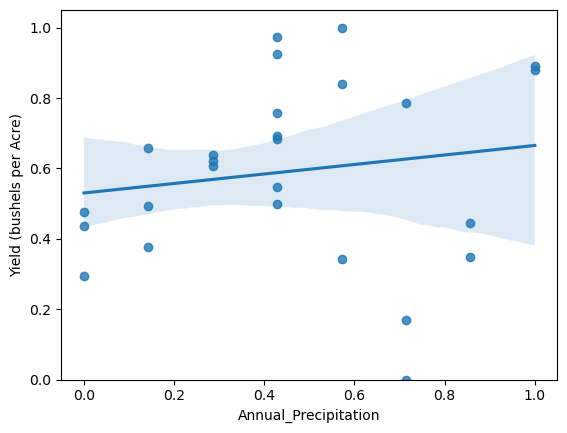

In [786]:
#Vizualizing the relatioship between corn yields and annual precipitation 

sns.regplot(x = 'Annual_Precipitation', y = 'Yield (bushels per Acre)',data = US_Corn_Production)
plt.ylim(0,)

#the plot shows a weak relationship/ no relationship 

In [815]:
#using pearson coefficient 

from scipy import stats

Pearson_Precipitation_Vs_Yield = stats.pearsonr(US_Corn_Production['Annual_Precipitation'], US_Corn_Production['Yield (bushels per Acre)'])
                                                         
Pearson_Precipitation_Vs_Yield

#Pearson coefficient confirms the above statement on weak relationship between precipitation amount and US corn yield. 
#However, this might be due to the fact that USA is a big country and in the analysis we used average annual precipitation across the country. 
#It might be the case that the analysis should be done on a state-by-state basis. However, this would need to be a part of a separate project. 
#At this stage, it can be concluded that an average annual precipitation across USA doesn't have any relationship with USA annual corn yields. 


PearsonRResult(statistic=0.15625361610825406, pvalue=0.44590725772999185)

(0.0, 1.1790173882465558)

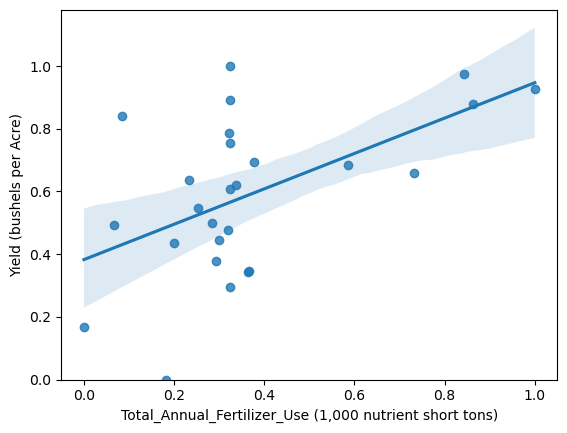

In [817]:
#Vizualizing the relatioship between corn yields and intensity of fertilizer use 

sns.regplot(x = 'Total_Annual_Fertilizer_Use (1,000 nutrient short tons)', y = 'Yield (bushels per Acre)',data = US_Corn_Production)
plt.ylim(0,)

#the regression plot below shows that some positive relationship exists 

In [843]:
#using pearson coefficient 


Pearson_Fertilizer_Use_Vs_Yield = stats.pearsonr(US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'], US_Corn_Production['Yield (bushels per Acre)'])
                                                         
Pearson_Fertilizer_Use_Vs_Yield 

#The below numbers confirm that a positive correlation exists.

PearsonRResult(statistic=0.5405789401313632, pvalue=0.0043560295865383595)

In [868]:
#Linear Regression - testing the model fit. Using intensity of fertilizer use as a predictor. 

from sklearn.linear_model import LinearRegression

lm =LinearRegression()
X = US_Corn_Production[['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)']]
Y = US_Corn_Production['Yield (bushels per Acre)']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat




array([0.48579139, 0.54261809, 0.38272253, 0.58978895, 0.58764574,
       0.5523296 , 0.49552185, 0.56317417, 0.42008361, 0.54776512,
       0.52544994, 0.56397989, 0.57251759, 0.51478629, 0.79582987,
       0.59599076, 0.43076322, 0.71264476, 0.56587159, 0.56587159,
       0.56587159, 0.94707961, 0.56587159, 0.85831925, 0.56587159,
       0.86923903])

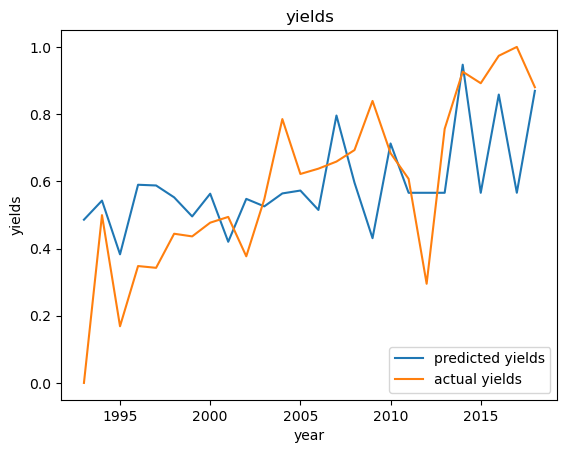

In [984]:
#Plotting 

import matplotlib.pyplot as plt
   
year = US_Corn_Production['Market_Year']
yields_predicted = [0.48579139, 0.54261809, 0.38272253, 0.58978895, 0.58764574,
       0.5523296 , 0.49552185, 0.56317417, 0.42008361, 0.54776512,
       0.52544994, 0.56397989, 0.57251759, 0.51478629, 0.79582987,
       0.59599076, 0.43076322, 0.71264476, 0.56587159, 0.56587159,
       0.56587159, 0.94707961, 0.56587159, 0.85831925, 0.56587159,
       0.86923903]

yields_actual = US_Corn_Production['Yield (bushels per Acre)']

  
plt.plot(year, yields_predicted)
plt.plot(year, yields_actual)
plt.title('yields')
plt.xlabel('year')
plt.ylabel('yields')
plt.legend(["predicted yields", "actual yields"], loc ="lower right")
plt.show()



/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yield (bushels per Acre)', ylabel='Density'>

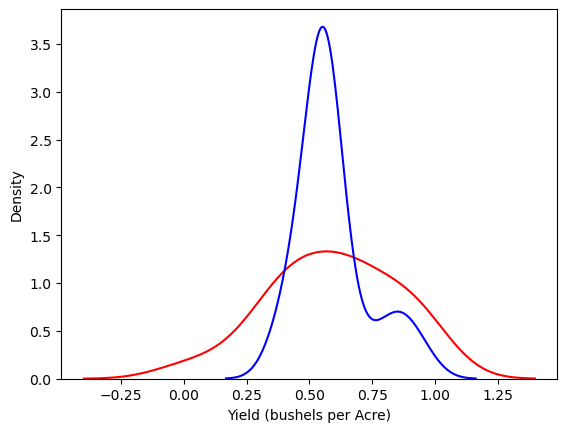

In [1007]:
#Drawing a residual plot 

from sklearn.linear_model import LinearRegression

lm =LinearRegression()
X = US_Corn_Production[['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)']]
Y = US_Corn_Production['Yield (bushels per Acre)']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat


ax1 = sns.distplot(US_Corn_Production['Yield (bushels per Acre)'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

In [1008]:
#Conculsions:

#1)Average annual precipitation across USA doesn't have any relationship with USA annual corn yields. To explore the matter deeper a state by state analysis might need to be used. 
#2)Intensity of fertilizer use in US has high degree of correlation with US annual corn yields. Pearson correlation coefficient value is over 0.5 and P of 0.004 shows that the coefficient is statistically significant. 

8.2 Precipitation;Instensity Of Fertilizer Use; Acreage Vs Corn Production Volumes

(0.0, 1.05)

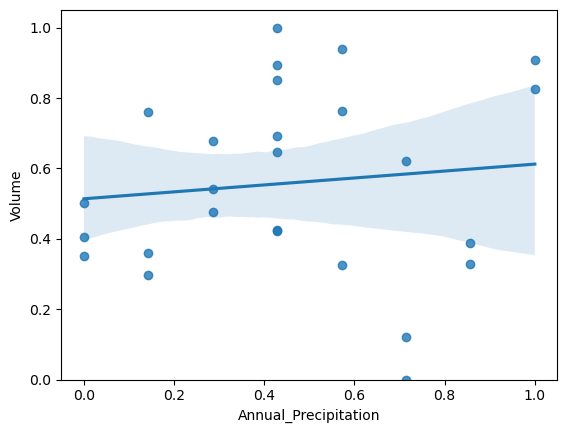

In [1009]:
#Vizualizing the relatioship between US corn production volume and US annual precipitation 

sns.regplot(x = 'Annual_Precipitation', y = 'Volume',data = US_Corn_Production)
plt.ylim(0,)

#the plot below shows weak/no relationship

In [1010]:
pearson_coef,p_value = stats.pearsonr(US_Corn_Production['Annual_Precipitation'], US_Corn_Production['Volume'])
                                                         
pearson_coef,p_value

#The below numbers confirm the absence of any correlation between US corn production volumes and average US precipitation across the country. 
#Again, an analysis on a state-by-state basis might need to be done. 

(0.11055543921656458, 0.5908169346584643)

/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.2109016663565417)

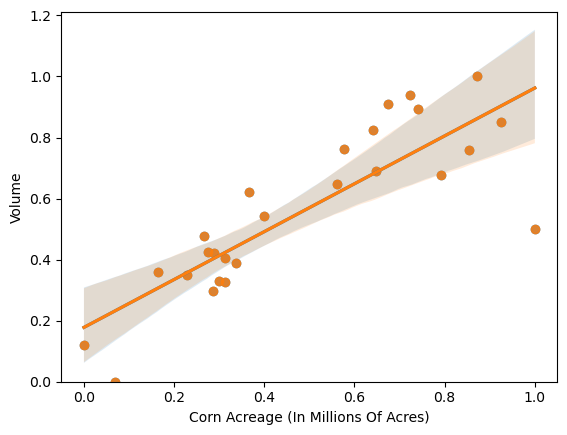

In [1012]:
#Vizualizing the relatioship between US corn production volume and size of the sown area under corn in US

ax = sns.regplot('Corn Acreage (In Millions Of Acres)', 'Volume',data = US_Corn_Production)

ax.ticklabel_format(style='plain')


sns.regplot(x = 'Corn Acreage (In Millions Of Acres)', y = 'Volume',data = US_Corn_Production)
plt.ylim(0,)

#the regression plot below shows that some positive relationship exists 

In [1013]:
#Using pearson coefficient 

pearson_coef,p_value = stats.pearsonr(US_Corn_Production['Corn Acreage (In Millions Of Acres)'], US_Corn_Production['Volume'])
                                                         
pearson_coef,p_value

#The below numbers confirm that a high positive correlation exists

(0.835424842791183, 1.0955777512765496e-07)

In [1014]:
#Linear Regression - testing the model fit. Using Acreage as a predictor. 

from sklearn.linear_model import LinearRegression

lm =LinearRegression()
X = US_Corn_Production[['Corn Acreage (In Millions Of Acres)']]
Y = US_Corn_Production['Volume']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat

array([0.23148   , 0.40409308, 0.17799425, 0.41351386, 0.42293465,
       0.44177621, 0.35759695, 0.42323854, 0.30623848, 0.40318139,
       0.3943684 , 0.46517623, 0.49100741, 0.3861632 , 0.84808553,
       0.61864384, 0.63079969, 0.68580492, 0.79976602, 0.96235052,
       0.90369854, 0.75904392, 0.68063868, 0.86236865, 0.74597638,
       0.70646987])

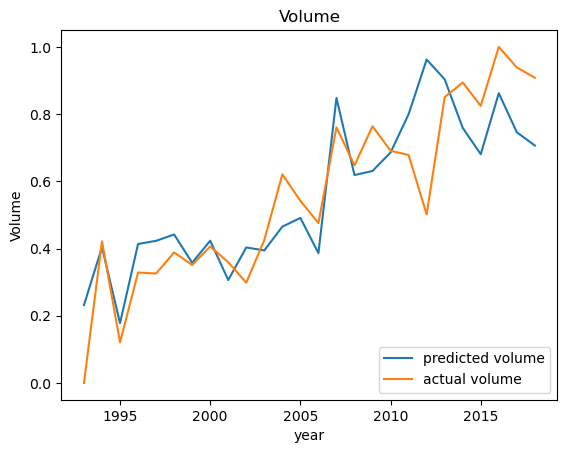

In [1057]:
#Plotting 

year_2 = US_Corn_Production['Market_Year']
volume_predicted_acreage = [0.23148   , 0.40409308, 0.17799425, 0.41351386, 0.42293465,
       0.44177621, 0.35759695, 0.42323854, 0.30623848, 0.40318139,
       0.3943684 , 0.46517623, 0.49100741, 0.3861632 , 0.84808553,
       0.61864384, 0.63079969, 0.68580492, 0.79976602, 0.96235052,
       0.90369854, 0.75904392, 0.68063868, 0.86236865, 0.74597638,
       0.70646987]

volume_actual = US_Corn_Production['Volume']

  
plt.plot(year_2, volume_predicted_acreage)
plt.plot(year_2, volume_actual)
plt.title('Volume')
plt.xlabel('year')
plt.ylabel('Volume')
plt.legend(["predicted volume", "actual volume"], loc ="lower right")
plt.show()

/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

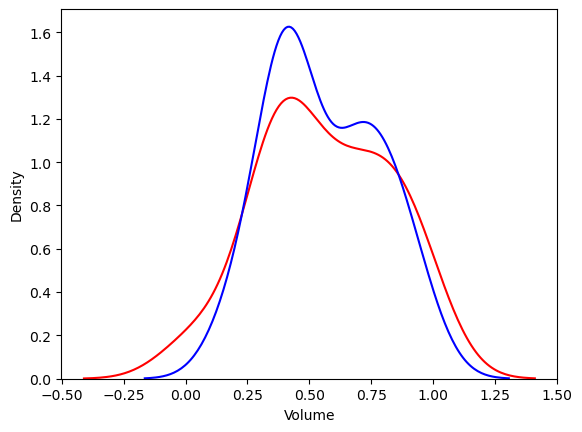

In [1071]:
#Drawing a residual plot 

from sklearn.linear_model import LinearRegression

lm =LinearRegression()
X = US_Corn_Production[['Corn Acreage (In Millions Of Acres)']]
Y = US_Corn_Production['Volume']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat


ax1 = sns.distplot(US_Corn_Production['Volume'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

In [ ]:
#Conclusion: US corn acreage seems to be a good predictor of US corn production volume.

/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.227324429729583)

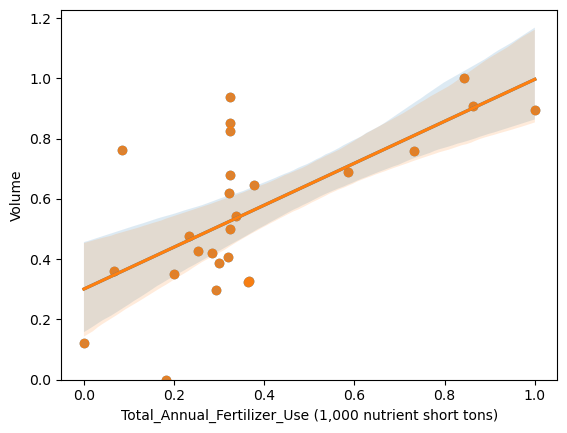

In [1072]:
#Vizualizing the relatioship between US corn production volume and intensity of fertilizer use in US for corn 

ax = sns.regplot('Total_Annual_Fertilizer_Use (1,000 nutrient short tons)', 'Volume',data = US_Corn_Production)

ax.ticklabel_format(style='plain')

sns.regplot(x = 'Total_Annual_Fertilizer_Use (1,000 nutrient short tons)', y = 'Volume',data = US_Corn_Production)
plt.ylim(0,)

#the regression plot below shows that some positive relationship exists 

In [1073]:
#Using pearson coefficient 

pearson_coef,p_value_3 = stats.pearsonr(US_Corn_Production['Total_Annual_Fertilizer_Use (1,000 nutrient short tons)'], US_Corn_Production['Volume'])
                                                         
pearson_coef,p_value_3

#The below numbers confirm that a high positive correlation exists. 

(0.6466298516632862, 0.00035782395675046)

In [1084]:
#It would interesting to see if the prediction accuracy will improve if we include corn acreage and fertilizer use for corn into one model using multiple linear regression

Z = US_Corn_Production[['Corn Acreage (In Millions Of Acres)','Total_Annual_Fertilizer_Use (1,000 nutrient short tons)']]

from sklearn.linear_model import LinearRegression

lm =LinearRegression()

Y = US_Corn_Production['Volume']

lm.fit(Z,Y)

Yhat=lm.predict(Z)

Yhat




array([0.23895946, 0.40803657, 0.14956002, 0.43634896, 0.44330552,
       0.44378098, 0.34872643, 0.43296226, 0.27307305, 0.4095025 ,
       0.39246274, 0.46841078, 0.49372741, 0.38097746, 0.8892897 ,
       0.61071749, 0.54933827, 0.7174456 , 0.74926371, 0.88533822,
       0.83624966, 0.88026647, 0.64956052, 0.9283054 , 0.70424467,
       0.80255536])

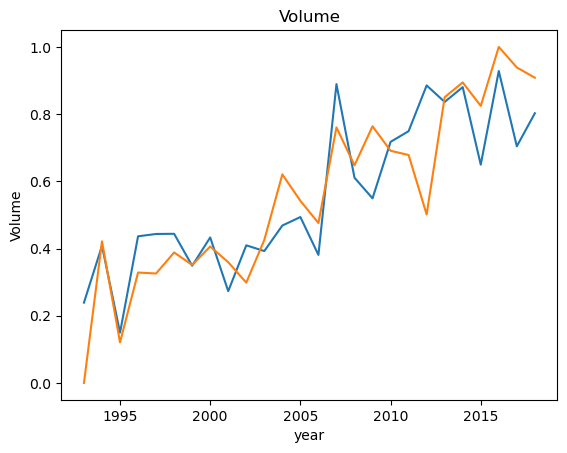

In [1085]:
#plotting 

year_3 = US_Corn_Production['Market_Year']
volume_predicted_2 = [0.23895946, 0.40803657, 0.14956002, 0.43634896, 0.44330552,
       0.44378098, 0.34872643, 0.43296226, 0.27307305, 0.4095025 ,
       0.39246274, 0.46841078, 0.49372741, 0.38097746, 0.8892897 ,
       0.61071749, 0.54933827, 0.7174456 , 0.74926371, 0.88533822,
       0.83624966, 0.88026647, 0.64956052, 0.9283054 , 0.70424467,
       0.80255536]

volume_actual_2 = US_Corn_Production['Volume']

  
plt.plot(year_2, volume_predicted_2)
plt.plot(year_2, volume_actual_2)
plt.title('Volume')
plt.xlabel('year')
plt.ylabel('Volume')
plt.show()



/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/germankosenkov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

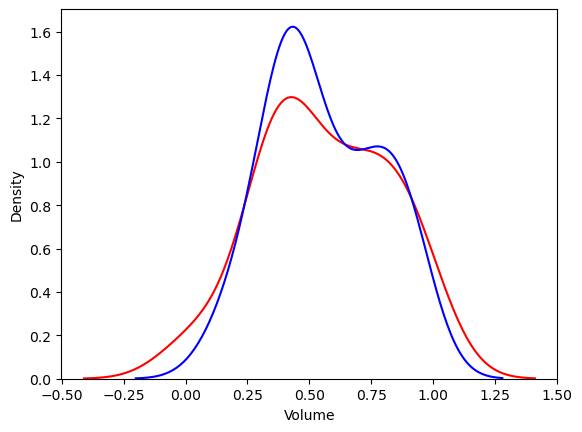

In [1086]:
#drawing a residual plot 

lm =LinearRegression()
X = Z
Y = US_Corn_Production['Volume']

lm.fit(X,Y)

Yhat=lm.predict(X)

Yhat


ax1 = sns.distplot(US_Corn_Production['Volume'],hist=False,color='r',label='Actual Volume')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Volumes',ax=ax1)


In [ ]:
#To understand which model fits better on the data (with one predictor or two) we need to compare their MSE's and R's squared

In [1098]:
#Calculating MSE for the model that uses only one predictor - Acreage 

from sklearn.metrics import mean_squared_error

MSE_One_Predictor = mean_squared_error(US_Corn_Production['Volume'],volume_predicted_acreage) 




In [1103]:
#Calculating MSE for the model that uses two predictors - Acreage And Intensity Of Fertilizer Use

from sklearn.metrics import mean_squared_error

MSE_Two_Predictors = mean_squared_error(US_Corn_Production['Volume'],volume_predicted_2) 

In [1107]:
#Calculating R squared for the model that uses only one predictor - Acreage 

X = US_Corn_Production [['Corn Acreage (In Millions Of Acres)']]
Y = US_Corn_Production ['Volume']

lm.fit(X,Y)

R_Squared_One_Predictor = lm.score(X,y)

In [1111]:
#Calculating MSE for the model that uses two predictors - Acreage And Intensity Of Fertilizer Use

A = US_Corn_Production [['Corn Acreage (In Millions Of Acres)','Total_Annual_Fertilizer_Use (1,000 nutrient short tons)']]
B = US_Corn_Production ['Volume']

lm.fit(A,B)

R_Squared_Two_Predictors = lm.score(A,B)



In [1112]:
#putting all the data into a dataframe for comparison 


Data_2 = [[R_Squared_One_Predictor,MSE_One_Predictor],[R_Squared_Two_Predictors,MSE_Two_Predictors]]

DF = pd.DataFrame(Data_2, columns = ['R squared','MSE'])

index = pd.Index(["Acreage","Acreage + Fertilizer Use"])

DF.set_index(index, inplace = True)

DF



,R squared,MSE
Acreage,0.697935,0.019955
Acreage + Fertilizer Use,0.730883,0.017779


In [ ]:
#Conclusion: The model with two predictors (Acreage + Fertilizer Use) has lower MSE and higher R squared than the model with one predictor (only Acreage). However, the difference is not dramatic. 

9.Conclusions 

Factors affecting US annual corn yields:

-Average annual precipitation across US doesn't have any relationship with US annual corn yields. To explore the matter deeper a state by state analysis might need to be used. 

-Intensity of fertilizer use in US has high degree of correlation with US annual corn yields. Pearson correlation coefficient value was over 0.5 and P Value of 0.004 showed that the coefficient was statistically significant. The regression results showed that the intensity of fertilizer use in US for corn can be a good predictor of US annual corn yields. 


Factors affecting US annual corn production volume:

-Average annual precipitation across US doesn't have any relationship with US annual corn production volume. To explore the matter deeper a state by state analysis might need to be used. 

-Size of the sown area under corn in US has high degree of correlation with US annual corn production volume. Pearson correlation coefficient value is over 0.8 and P Value of 1.0955777512765496e-07 shows that the coefficient is statistically significant. The regression results show that size of the sown area under corn in US can be a good predictor of US annual corn production volume. 

-Intensity of fertilizer use in US has high degree of correlation with US annual corn production volume. Pearson correlation coefficient value is over 0.6 and P Value of 0.0003 shows that the coefficient is statistically significant. The regression results show that the intensity of fertilizer use in US for corn can be a good predictor of US annual corn production volume. 

-The model with two predictors (Acreage + Fertilizer Use) has lower MSE and higher R squared than the model with one predictor (only Acreage). However, the difference is not dramatic. 


